# Artificial Neural Network (ANN)

In this example, we import an .csv file that contains a bank's customer information. The ANN feeds on customer info and then computes this to the outcome (whether the customer decides to leave within 6 months or not.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
# A data set that describes customer information of a bank
dataset = pd.read_csv('Churn_Modelling.csv')
#take column no.3 to second last column
X = dataset.iloc[:,3:-1].values
#take the last column
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [4]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Categorial data consist of X\[:,1](Country) and X\[:,2](Gender)

(1)Label Encoding the "Gender" column

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

"Gender" column is now encoded by 0(female) and 1(male)

In [6]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


(2)One Hot Encoding the "Geography" column

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

We can see that 'France' is coded as \[0, 0, 1], Spain is coded as \[0,0,1] and Germany \[0,1,0]

In [8]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

print('Size for training data',len(X_train),'\nSize for test data',len(X_test))
print('Note: X arranges as [0,0,1] country code, credit score,gender ... savings')
print('X[0]',X_train[0])

Size for training data 8000 
Size for test data 2000
Note: X arranges as [0,0,1] country code, credit score,gender ... savings
X[0] [0.0 0.0 1.0 667 0 34 5 0.0 2 1 0 163830.64]


### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[0])

[-1.01460667 -0.5698444   1.74309049  0.16958176 -1.09168714 -0.46460796
  0.00666099 -1.21571749  0.8095029   0.64259497 -1.03227043  1.10643166]


## Part 2 - Building the ANN

### Initializing the ANN


In [11]:
#As a sequence of layers
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [12]:
# 6 hidden neurons in the first hidden layer
# unfortunately no rule of thumb with the number of choice
# activation function being rectifier(linear)
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer
one neuron (i.e. one final output) As we only wants to know whether the customer decides to stay or not.
Sigmoid  function(See below) can also give the probablity:

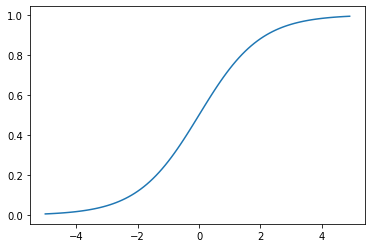

In [22]:
x = np.arange(-5,5,0.1)
y = np.exp(x)/(np.exp(x)+1)

plt.plot(x, y)
plt.show()

In [23]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [24]:
# adam optimizer: guess gredient descent
#loss function: weighted difference between model and results
#evaluation matrics = accuracy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [25]:
#batch_size: No.of trainning data that are grouped together (default 32)
#epoch: training iteration
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.6045 - accuracy: 0.7261
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4642 - accuracy: 0.8060
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8191
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4211 - accuracy: 0.8254
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8280
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8331
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8367
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3868 - accuracy: 0.8396
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8449
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3715 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8626
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8630
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8627
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8625
Epoch 85/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8635
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8620
Epoch 87/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8625
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8612
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8622
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank: 

In [ ]:
Geography: France #CODE [1,0,0]

Credit Score: 600

Gender: Male #[1]

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes #[1]

Is this customer an Active Member: Yes #[1]

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

**Solution**

In [28]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))>0.5)

[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [31]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#vectoration of y_pred and real results
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
#ac = (cm[0,0]+ cm[1,1])/No.tests
ac = accuracy_score(y_test, y_pred)
print(cm, ac)

[[1522   73]
 [ 202  203]]
0.8625 0.8625
